In [1]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

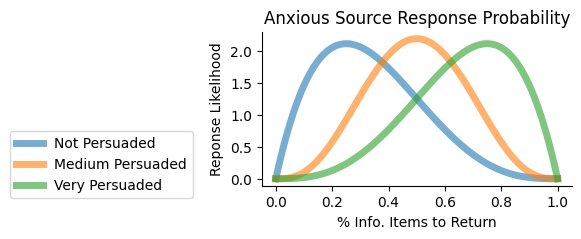

In [2]:
fig, ax = plt.subplots(1, 1, figsize=(4,2))

b = 5
ps = [(i, b) for i in [2, 3, 4, 5, 6]]
for a, b, label in [(2, 4, 'Not Persuaded'), (4, 4, 'Medium Persuaded'), (4, 2, 'Very Persuaded'), ]:
    x = np.linspace(0, 1, 100)
    y = beta.pdf(x, a, b)
    ax.plot(x, y, lw=5, alpha=0.6, label=label)

ax.legend(bbox_to_anchor=(-.2, .4))
ax.set_title('Anxious Source Response Probability')
ax.set_ylabel('Reponse Likelihood')
ax.set_xlabel('% Info. Items to Return')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [75]:
PERSONA_DICT = {
    'anxious': [(3, 7), (4, 6), (5, 5), (7, 3.5), (9, 2)],
    'avoidant': [(2.5, 6.5), (5, 6.75), (7, 7), (7.25, 4), (7.5, 1.5)],
    'adversarial': [(1, 9), (2, 8.5), (4, 8), (8, 7.5), (9, 7)],
    'defensive': [(4, 8), (6, 7), (8.5, 6.5), (8.5, 4.25), (8.5, 2)],
    'straightforward': [(2, 5.5), (4, 5.5), (5.5, 5.5), (7.75, 4), (10, 2.5)],
    'poor explainer': [(3.5, 7.5), (5.5, 7.5), (7.5, 7.5), (7.25, 4.35), (7, 1.2)],
    'dominating': [(2, 6), (4, 6), (6, 6), (7.5, 3.8), (8, 1.6)],
    'clueless': [(3.6, 8.0), (4.8, 6.5), (5, 5), (6.55, 3.3), (8.1, 1.6)]
}

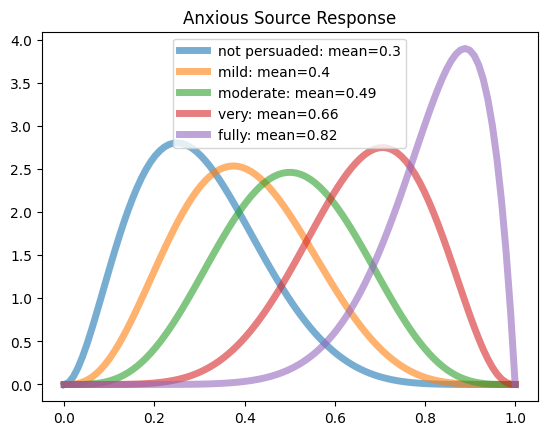

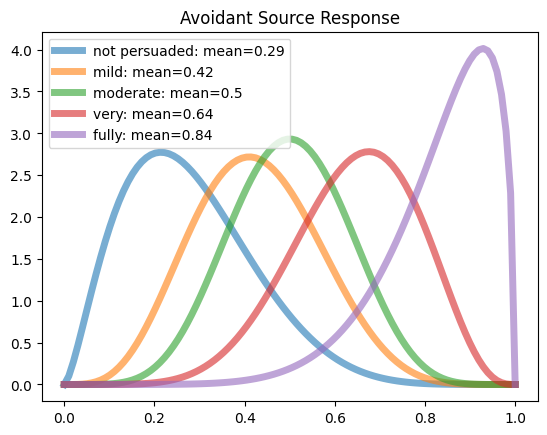

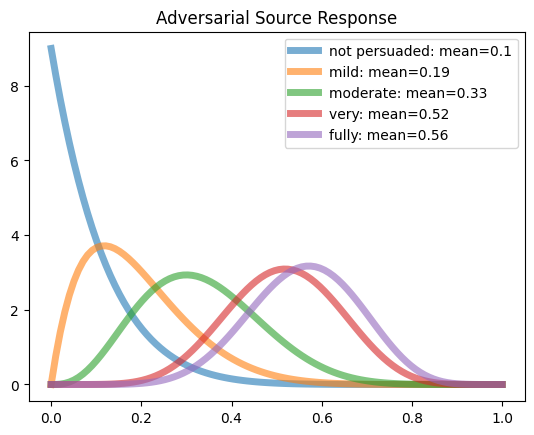

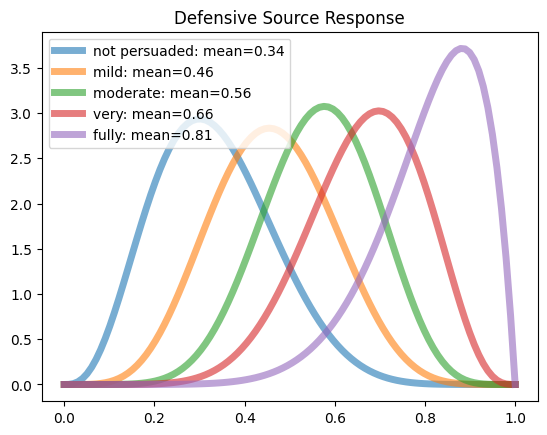

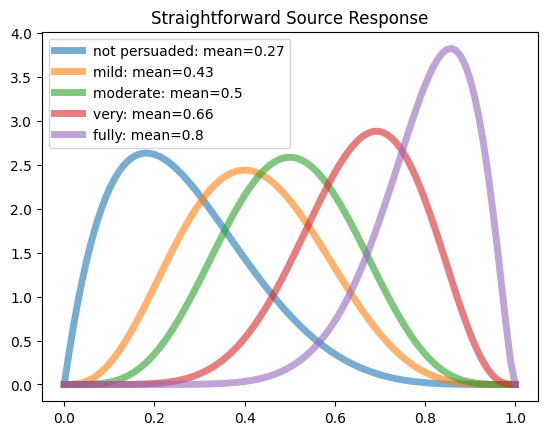

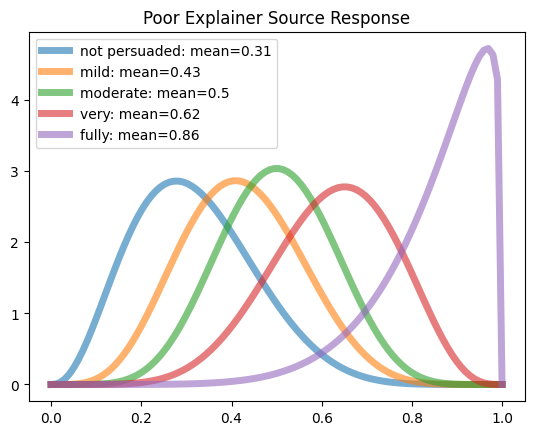

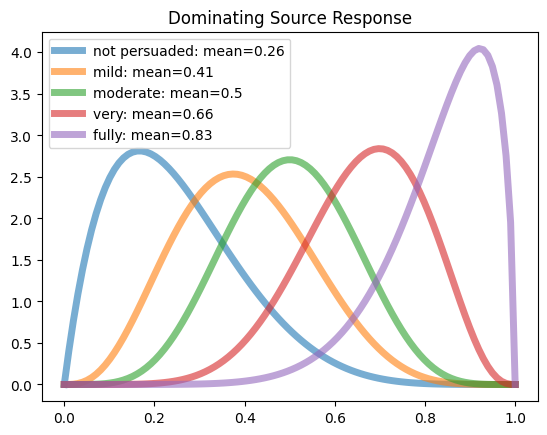

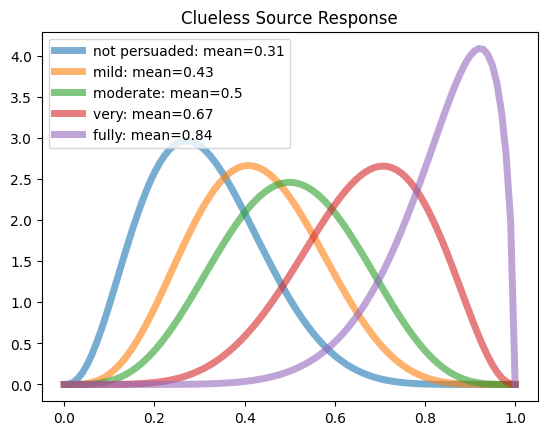

In [76]:
x = np.linspace(0, 1, 100)
persuasion_levels = ['not persuaded', 'mild', 'moderate', 'very', 'fully']
for persona, curves in PERSONA_DICT.items():
    fig, ax = plt.subplots(1, 1)
    for i, (a, b) in enumerate(curves):
        y = beta.pdf(x, a, b)
        samples = list(map(lambda x: max(0.0, min(1.0, beta.rvs(a, b))), range(1000)))
        ax.plot(x, y, lw=5, alpha=0.6, label=f'{persuasion_levels[i]}: mean={round(np.mean(samples), 2)}')
        
    ax.set_title(f'{persona.title()} Source Response')
    ax.legend()
    plt.show()

# Plot spikier distributions

In [58]:
import pandas as pd 

hyperparameters = pd.DataFrame({
    'not persuaded': [
        (3, 7),
        (2.5, 6.5),
        (4, 8),
        (2, 5.5),
        (3.5, 7.5),
        (2, 6),
        (3.6, 8.0)
    ],
    "moderately": [
        (5, 5),
        (7, 7),
        (8.5, 6.5),
        (5.5, 5.5),
        (7.5, 7.5),
        (6, 6),
        (5, 5)
    ],
    "very": [
        (9, 2),
        (7.5, 1.5),
        (8.5, 2),
        (10, 2.5),
        (7, 1.2),
        (8, 1.6),
        (8.1, 1.6)
    ]
})

persona_list =[ 
    'anxious',
    'avoidant',
    'defensive',
    'straightforward',
    'poor explainer',
    'dominating',
    'clueless',
]

In [60]:
PERSONA_DICT = {
    persona: [
        hyperparameters['not persuaded'][i], 
        hyperparameters['moderately'][i], 
        hyperparameters['very'][i]
    ] 
    for i, persona in enumerate(persona_list)
}

/var/folders/xh/qnyq7yzj0r328_7hnb7pgxth0000gp/T/ipykernel_59139/1006854897.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hyperparameters['not persuaded'][i],
/var/folders/xh/qnyq7yzj0r328_7hnb7pgxth0000gp/T/ipykernel_59139/1006854897.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hyperparameters['moderately'][i],
/var/folders/xh/qnyq7yzj0r328_7hnb7pgxth0000gp/T/ipykernel_59139/1006854897.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use

In [61]:
PERSONA_DICT

{'anxious': [(3, 7), (5, 5), (9, 2)],
 'avoidant': [(2.5, 6.5), (7, 7), (7.5, 1.5)],
 'defensive': [(4, 8), (8.5, 6.5), (8.5, 2)],
 'straightforward': [(2, 5.5), (5.5, 5.5), (10, 2.5)],
 'poor explainer': [(3.5, 7.5), (7.5, 7.5), (7, 1.2)],
 'dominating': [(2, 6), (6, 6), (8, 1.6)],
 'clueless': [(3.6, 8.0), (5, 5), (8.1, 1.6)]}

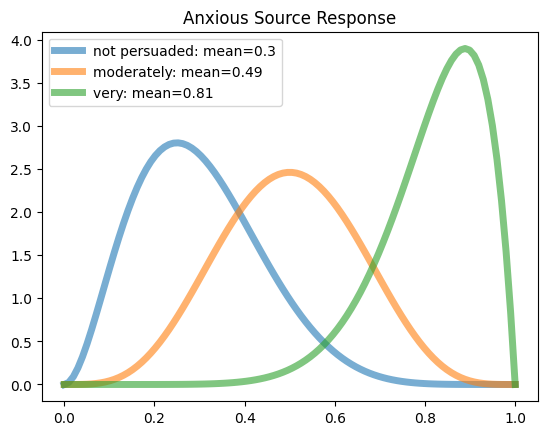

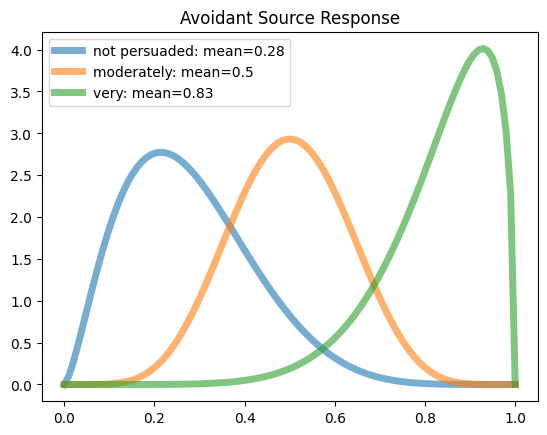

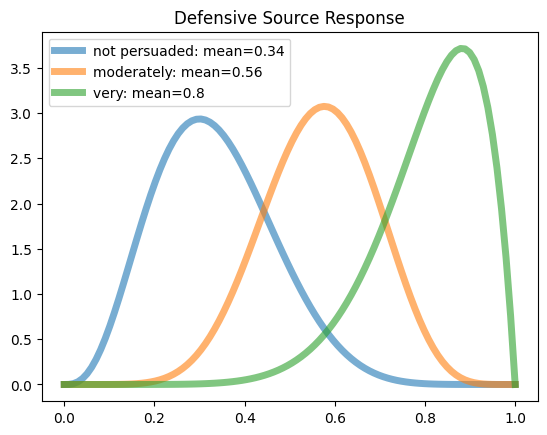

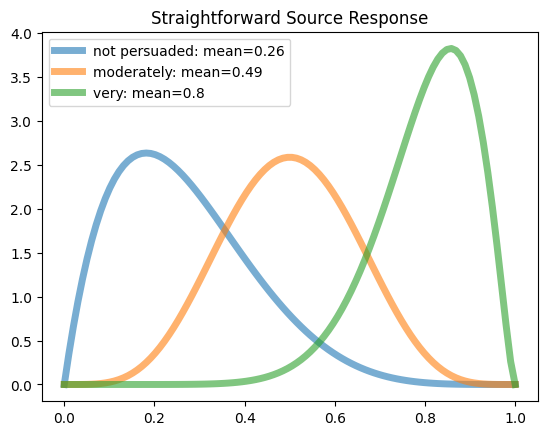

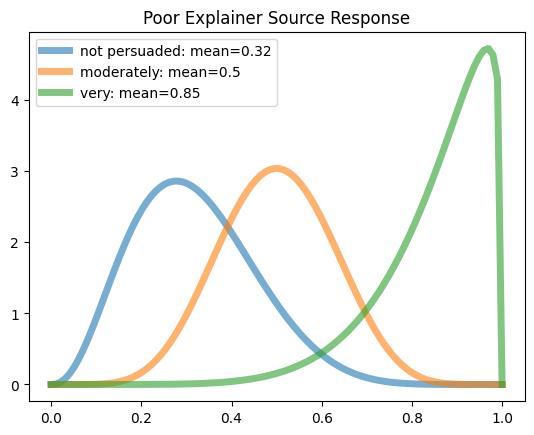

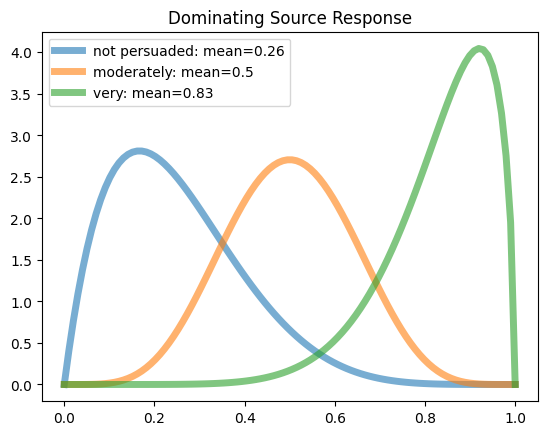

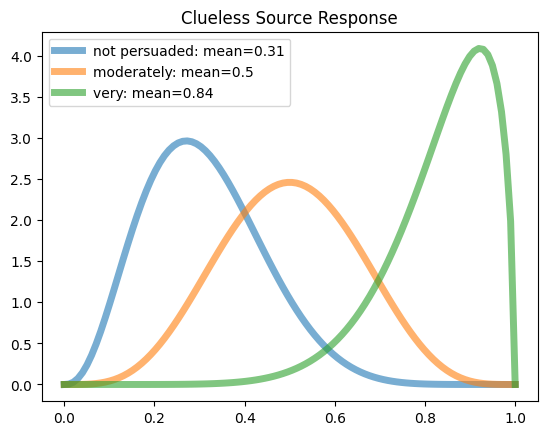

In [59]:
hyperparameters.index = persona_list
x = np.linspace(0, 1, 100)
persuasion_levels = ['not persuaded', 'moderately', 'very']
for persona, curves in hyperparameters.iterrows():
    fig, ax = plt.subplots(1, 1)
    for i, (a, b) in curves.items():
        y = beta.pdf(x, a, b)
        samples = list(map(lambda x: max(0.0, min(1.0, beta.rvs(a, b))), range(1000)))
        ax.plot(x, y, lw=5, alpha=0.6, label=f'{i}: mean={round(np.mean(samples), 2)}')
        
    ax.set_title(f'{persona.title()} Source Response')
    ax.legend()
    plt.show()

# slop

In [46]:
k = 7

In [53]:
step_size = int(100 / k )

In [54]:
num_steps = int(100 / steps)

In [68]:
bins = list(range(0, 100, step_size))
bins = bins[:-1] + [101]

In [69]:
num_steps

7

In [70]:
import pandas as pd

In [75]:
q = pd.cut(y * 100, bins, right=False)

In [77]:
pd.Series(q).value_counts()

[0, 14)      14
[84, 101)     7
[14, 28)      6
[42, 56)      6
[28, 42)      5
[56, 70)      5
[70, 84)      5
Name: count, dtype: int64

In [104]:
x = np.linspace(0, 1, 100)
bins_to_sum = np.digitize(x * 100, bins)  - 1

In [109]:
pd.concat([
    pd.Series(y),
    pd.Series(bins_to_sum)
], axis=1).groupby(1)[0].sum()

1
0     9.127207
1    21.488370
2    24.585024
3    21.267787
4    14.387276
5     6.794112
6     1.340123
Name: 0, dtype: float64

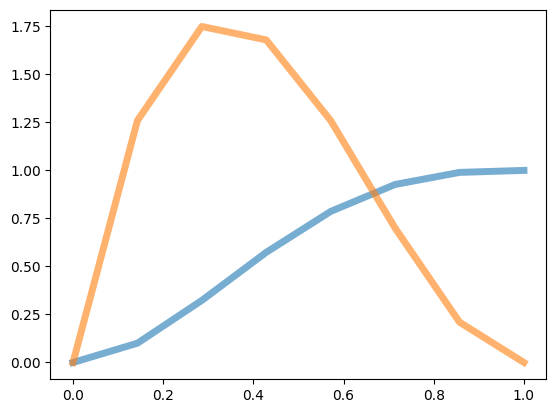

In [119]:
fig, ax = plt.subplots(1, 1)

x = np.linspace(0, 1, 8)
y_cdf = beta.cdf(x, a, b)
ax.plot(x, y_cdf, lw=5, alpha=0.6, label='beta pdf')
y = beta.pdf(x, a, b)
ax.plot(x, y, lw=5, alpha=0.6, label='beta pdf')

In [121]:
ps = y_cdf[1:] - y_cdf[:-1]

In [122]:
import numpy as np

In [142]:
pd.Series(np.random.choice(range(7), size=1000, p=ps)).value_counts().pipe(lambda s: s /s.sum())

2    0.258
1    0.246
3    0.202
4    0.120
0    0.110
5    0.054
6    0.010
Name: count, dtype: float64

In [125]:
ps

array([0.10037484, 0.22282382, 0.25031237, 0.21282799, 0.14035818,
       0.06289046, 0.01041233])

In [143]:
import numpy as np

PERSONA_DICT = {
    'anxious': [(2, 4), (4, 4), (4, 2)],
    'avoidant': [(7, 2), (4, 3), (2, 3)],
}

def sample_info_items(num_info_items, persuasion_level, persona):
    a, b = persona_dict[persona][persuasion_level]
    x = np.linspace(0, 1, num_info_items)
    y_cdf = beta.cdf(x, a, b)
    ps = y_cdf[1:] - y_cdf[:-1]
    return np.random.choice(range(num_info_items), p=ps)